# Baghiz Zuhdi Adzin_0706022010017 Exercise Week 8:Clustering 
-------------------------------------------

dataset:

a. Data Rumah : https://raw.githubusercontent.com/baghizzhd/Week8DataMining/main/Data%20Rumah.csv

b. Opsi Isian : https://raw.githubusercontent.com/baghizzhd/Week8DataMining/main/Opsi%20Isian.csv

Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer

Load dataset

In [2]:
url = "https://raw.githubusercontent.com/baghizzhd/Week8DataMining/main/Data%20Rumah.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
#Melihat null value pada kolom
print(df.isnull().sum())

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64


In [4]:
#Mengisi NaN Values with Mean
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [5]:
#Cek null value pada kolom
print(df.isnull().sum())

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64


In [6]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,226.951299,266.688312,4.275974,3.337662,1.857143
std,201.821447,213.161697,1.643804,1.627215,0.511160
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.500000,200.000000,4.000000,3.000000,2.000000
75%,283.000000,328.750000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [7]:
#mengecek isi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  308 non-null    object 
 1   Nama Daerah                    308 non-null    object 
 2   Luas Tanah (m2)                308 non-null    float64
 3   Luas Bangunan (m2)             308 non-null    float64
 4   Jumlah Kamar                   308 non-null    float64
 5   Jumlah Kamar Mandi             308 non-null    float64
 6   Tingkat/Lantai                 308 non-null    float64
 7   Harga Penawaran (dari Owner)   308 non-null    object 
 8   Terjual/Belum                  308 non-null    object 
 9   Arah Hadap Rumah               308 non-null    object 
 10  Posisi Rumah                   308 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


In [8]:
#df = df[df['Harga Penawaran (dari Owner)'] != " "]
#df

In [9]:
lb = LabelEncoder()
df["Area Category"] = lb.fit_transform(df["Area Category"])
df["Nama Daerah"] = lb.fit_transform(df["Nama Daerah"])
df["Harga Penawaran (dari Owner)"] = lb.fit_transform(df["Harga Penawaran (dari Owner)"])
df["Terjual/Belum"] = lb.fit_transform(df["Terjual/Belum"])
df["Arah Hadap Rumah"] = lb.fit_transform(df["Arah Hadap Rumah"])
df["Posisi Rumah"] = lb.fit_transform(df["Posisi Rumah"])
df["Lebar Jalan Depan Rumah (ROW)"] = lb.fit_transform(df["Lebar Jalan Depan Rumah (ROW)"])
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0


In [10]:
# scaling 
sc = StandardScaler()
standarized_data = sc.fit_transform(df)

In [11]:
standarized_data 

array([[ 1.00437212, -1.37074241,  0.0647599 , ...,  0.83949741,
        -0.18806854, -0.8255808 ],
       [-1.67782395,  1.04750903, -0.97745709, ...,  0.83949741,
        -0.18806854,  0.22083437],
       [ 1.00437212, -0.36540192, -0.28264577, ..., -1.14184513,
        -5.4539876 , -0.8255808 ],
       ...,
       [-0.78375859,  0.31388219, -0.62012555, ..., -1.14184513,
        -0.18806854, -0.8255808 ],
       [ 1.00437212,  1.18336586, -0.63997731, ...,  0.83949741,
        -0.18806854,  1.26724954],
       [-1.67782395,  1.50942223, -0.16849819, ...,  0.83949741,
        -0.18806854,  1.26724954]])

## K-Means Clustering

Dengan elbow method, tentukan jumlah cluster yang ingin dibentuk

Gunakan range elbow range(1, 11)

In [12]:
# set the parameter for evaluating K
kmeans_kwargs = {"init" : "k-means++","n_init" :10,"max_iter":300, "random_state":42}
sse = []

# check the inertia for each K
for k in range(1,11):
    km = KMeans(n_clusters=k,**kmeans_kwargs)
    km.fit(standarized_data)
    sse.append(km.inertia_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


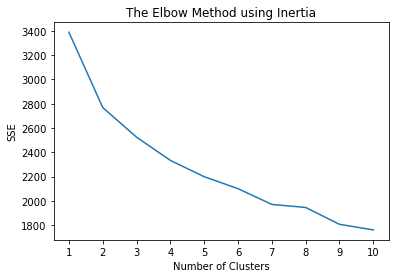

In [13]:
# manually visualize the elbow method using plotlib

plt.plot(range(1, 11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method using Inertia')
plt.show()

In [14]:
# using kneelocator to find the elbow/knee
findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best knee for model = ", findknee.elbow)

The best knee for model =  4


In [15]:
# Membagi menjadi 4 cluster
kmeans = KMeans(n_clusters=4,init="random").fit(standarized_data)
sse.append(km.inertia_)
df_kmeans = kmeans.predict(standarized_data)
df["Cluster"]=df_kmeans
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0,3
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1,0
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0,3
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0,1
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0,1


In [16]:
df.groupby("Cluster").agg(Area_Category = ('Area Category',pd.Series.mode), Nama_Daerah = ('Nama Daerah',pd.Series.mode), Luas_Tanah = ('Luas Tanah (m2)', 'mean'), Luas_Bangunan = ('Luas Bangunan (m2)','mean'), Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'), Tingkat_Lantai = ('Tingkat/Lantai ','mean'), Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'), Terjual_Belum = ('Terjual/Belum', pd.Series.mode), Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode), Posisi_Rumah = ('Posisi Rumah', pd.Series.mode), Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ("Cluster",'count'))

ValueError: Must produce aggregated value

## Hierarchical Clustering
Hierarchical clustering ini menggunakan metode agglomerative.

Plot Dendrogram untuk membantu menentukan jumlah cluster, gunakan max method.

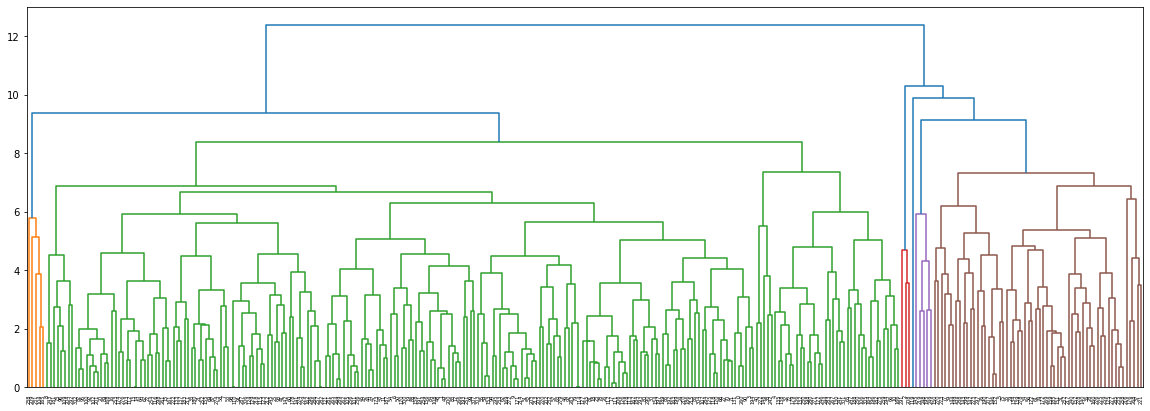

In [17]:
plt.figure(figsize=(20,7))
linkage_data = linkage(standarized_data, method='complete')
dendrogram(linkage_data)
plt.show()

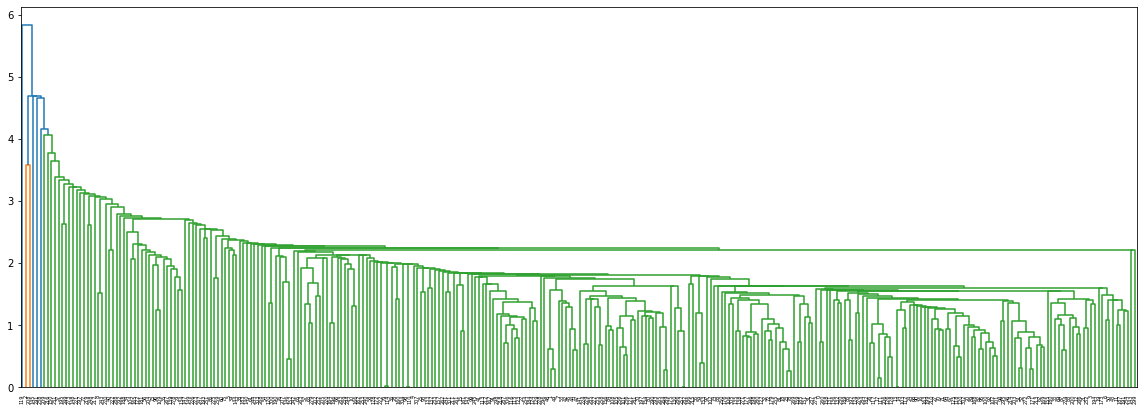

In [18]:
plt.figure(figsize=(20,7))
linkage_data = linkage(standarized_data , method='single')
dendrogram(linkage_data)
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
linkage_data = linkage(standarized_data , method='ward')
dendrogram(linkage_data)
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
linkage_data = linkage(standarized_data, method='average')
dendrogram(linkage_data)
plt.show()

Lakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
label = model.fit_predict(standarized_data)
print(label)

Tampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [ ]:
df["Cluster"] = label

df.groupby("Cluster").agg(Area_Category = ('Area Category',pd.Series.mode), Nama_Daerah = ('Nama Daerah',pd.Series.mode), Luas_Tanah = ('Luas Tanah (m2)', 'mean'), Luas_Bangunan = ('Luas Bangunan (m2)','mean'), Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'), Tingkat_Lantai = ('Tingkat/Lantai ','mean'), Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'), Terjual_Belum = ('Terjual/Belum', pd.Series.mode), Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode), Posisi_Rumah = ('Posisi Rumah', pd.Series.mode), Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ("Cluster",'count'))